In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

/data/mutakabbir/Lightning/venv/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
DATABASE_TYPE="postgresql"
USERNAME="mutakabbir"
PASSWORD="lightning"
HOST="localhost"
PORT=5432
DATABASE_NAME="postgres"
FIRE_SUBDIVISION_TABLE = "fire_division_dataset"

In [3]:
engine = create_engine(f"{DATABASE_TYPE}://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE_NAME}")

In [6]:
query_subdivision_cluster_fire_gdf = """select * from fire_division_dataset as fdd"""

query_fire_by_time_div = lambda div_id: f"""
select fdd.division_id, fdd.start_date, sum(st_area(fdd.geometry, true)) / avg(st_area(sd.geometry, true)) * 100 as area_burnt_precent
from fire_division_dataset fdd
join subdivision_dataset sd on sd.cid = fdd.division_id
where fdd.division_id = {div_id}
group by fdd.division_id, fdd.start_date 
order by fdd.division_id
"""

In [18]:
fire_gdf = gpd.read_postgis(
    sql=query_subdivision_cluster_fire_gdf, 
    con=engine,
    geom_col="geometry",
    crs="EPSG:4326",)  

<AxesSubplot:xlabel='division_id'>

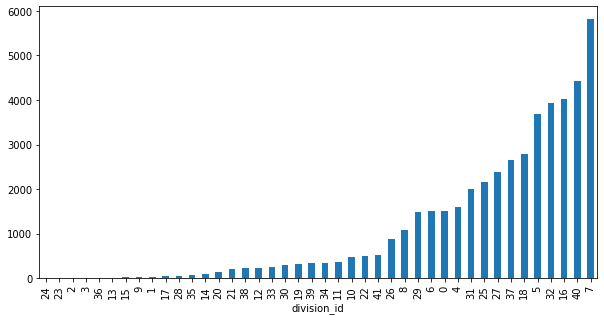

In [19]:
fire_gdf.groupby('division_id')['division_id'].count().sort_values().plot(kind='bar', figsize=(10,5))

In [21]:
fire_gdf.groupby('division_id')['division_id'].count()

division_id
0     1518
1       29
2        8
3        8
4     1595
5     3694
6     1499
7     5812
8     1088
9       26
10     481
11     370
12     235
13      12
14      82
15      18
16    4026
17      50
18    2793
19     325
20     141
21     211
22     499
23       6
24       3
25    2153
26     881
27    2374
28      52
29    1476
30     290
31    1995
32    3933
33     259
34     351
35      77
36       8
37    2646
38     233
39     344
40    4435
41     521
Name: division_id, dtype: int64

In [25]:
fire_gdf.groupby('division_id')['division_id'].count().sum() 

46557

In [7]:
fire_div_time_stats_df = pd.read_sql(
    sql=query_fire_by_time_div(0), 
    con=engine)  

<AxesSubplot:xlabel='start_date'>

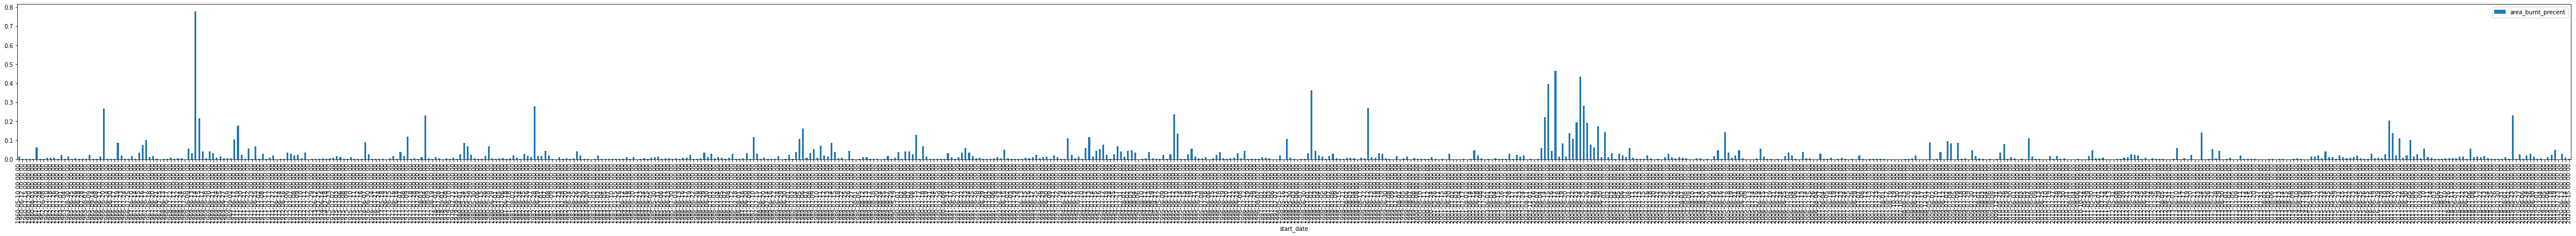

In [16]:
fire_div_time_stats_df.plot(
    x='start_date',
    y='area_burnt_precent',
    kind='bar',
    figsize=(80,5)
)

In [17]:
len(fire_div_time_stats_df)

723